In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [186]:
train_df = pd.read_csv('train.csv', header=0, parse_dates=[2],index_col=2)

In [187]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 4 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2)
memory usage: 13.3 MB


In [188]:
train_df.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [189]:
train_df.tail()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2012-09-28,45,98,508.37,False
2012-10-05,45,98,628.10,False
2012-10-12,45,98,1061.02,False
2012-10-19,45,98,760.01,False
2012-10-26,45,98,1076.80,False


In [190]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 4 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2)
memory usage: 13.3 MB


In [191]:
def log_transform_WeeklySales(col):
    Weekly_Sales = col[0]
    
    if Weekly_Sales <= 0:
        return 0
    else:
        return np.log(Weekly_Sales)

In [193]:
#Log transform Weekly sales
train_df['Log_WeeklySales'] = train_df[['Weekly_Sales']].apply(log_transform_WeeklySales,axis=1)

In [194]:
train_df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Log_WeeklySales
Date,,,,,
2010-02-05,1,1,24924.50,False,10.123607
2010-02-12,1,1,46039.49,True,10.737255
2010-02-19,1,1,41595.55,False,10.635748
2010-02-26,1,1,19403.54,False,9.873211
2010-03-05,1,1,21827.90,False,9.990944


In [195]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 5 columns):
Store              421570 non-null int64
Dept               421570 non-null int64
Weekly_Sales       421570 non-null float64
IsHoliday          421570 non-null bool
Log_WeeklySales    421570 non-null float64
dtypes: bool(1), float64(2), int64(2)
memory usage: 16.5 MB


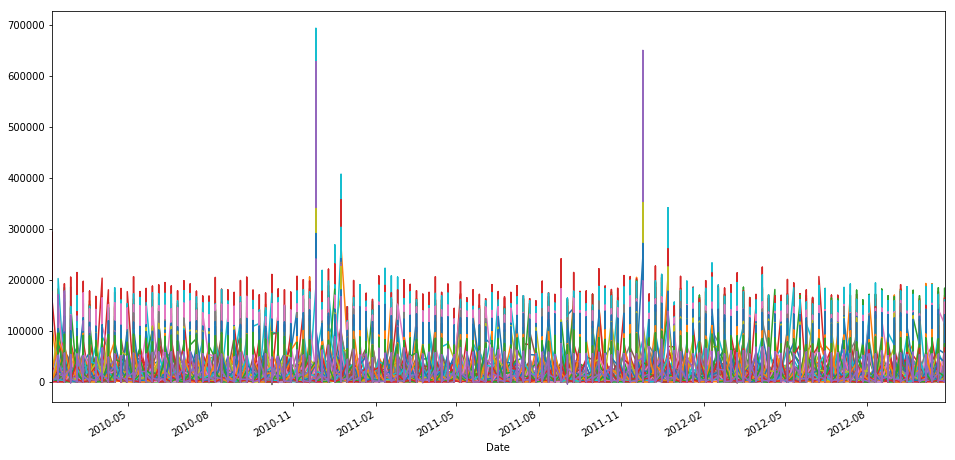

In [196]:
train_df.groupby(['Store'])['Weekly_Sales'].plot(figsize=(16,8));

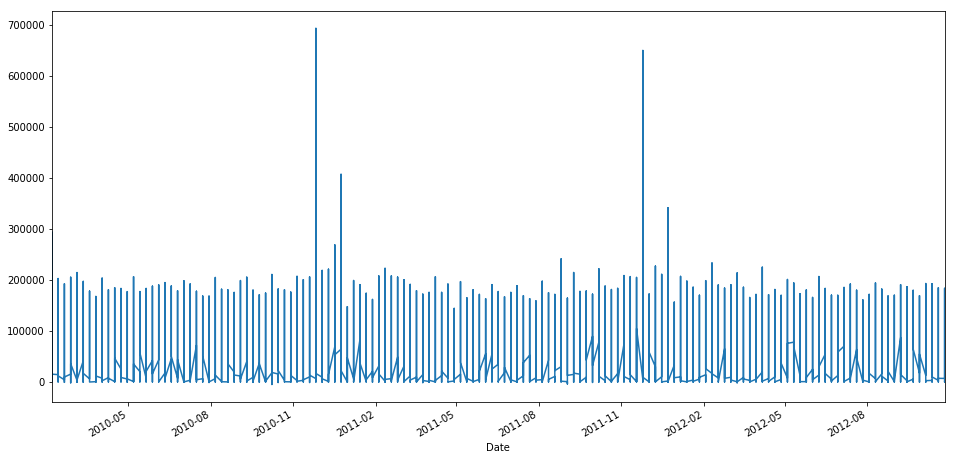

In [52]:
train_df['Weekly_Sales'].plot(figsize=(16,8))

In [9]:
## Looking at the plot above, there is clear indication of seasonality. 
## Sales in Nov, Dec seems to be high for both years plotted.

In [10]:
## This suggests that the time series is not stationary and will require differencing to make it stationary

In [11]:
#from statsmodels.tsa.stattools import adfuller
#X = series['Weekly_Sales'].values
#result = adfuller(X) ## *************this runs for almost 3 mins***************
#print('ADF Statistic: %f' % result[0])
#print('p-value: %f' % result[1])
#print('Critical Values:')
#for key, value in result[4].items():
#    print('\t%s: %.3f' % (key, value))

In [12]:
##************* Question: Test Statistic is lesser than critical values, suggesting that data is stationary,
## eventhough we see seasonality in the plotted graph. Why is this? ********************

### Remove seasonality and make data stationary

In [37]:
## Trend, Seasonality need to be removed by creating features with lag 52 

In [222]:
def create_features_New(df):
    df1 = pd.concat((df.rolling(window=52).mean()
                     ,df.rolling(window=52).std()
                     ,df-df.shift(1)
                     ,(df-df.shift(1)).rolling(window=52).mean()
                     ,df-df.shift(52)
                     ,(df-df.shift(52)).rolling(window=52).mean()
                     ,(df-df.shift(52)).rolling(window=52).std()
                     )
                    ,axis=1) 
    df1.columns = ['Rolling_Mean', 'Rolling_Std'
                   ,'FirstDiff_shift_1'
                   ,'RollMean_FirstDiff'
                   ,'Seasonal_Diff'
                   ,'Roll_Mean_SeasonalDiff'
                   ,'Roll_Std_SeasonalDiff'
                   ]
    return df1

In [223]:
train_new = pd.concat((train_df, train_df.groupby(['Store'])[['Weekly_Sales']].apply(create_features_New)),axis=1)

In [224]:
train_new.head(60)
#del(train_new)

,Store,Dept,Weekly_Sales,IsHoliday,Log_WeeklySales,Rolling_Mean,Rolling_Std,FirstDiff_shift_1,RollMean_FirstDiff,Seasonal_Diff,Roll_Mean_SeasonalDiff,Roll_Std_SeasonalDiff
Date,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,10.123607,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-12,1,1,46039.49,True,10.737255,NaN,NaN,21114.99,NaN,NaN,NaN,NaN
2010-02-19,1,1,41595.55,False,10.635748,NaN,NaN,-4443.94,NaN,NaN,NaN,NaN
2010-02-26,1,1,19403.54,False,9.873211,NaN,NaN,-22192.01,NaN,NaN,NaN,NaN
2010-03-05,1,1,21827.90,False,9.990944,NaN,NaN,2424.36,NaN,NaN,NaN,NaN
2010-03-12,1,1,21043.39,False,9.954342,NaN,NaN,-784.51,NaN,NaN,NaN,NaN
2010-03-19,1,1,22136.64,False,10.004989,NaN,NaN,1093.25,NaN,NaN,NaN,NaN
2010-03-26,1,1,26229.21,False,10.174629,NaN,NaN,4092.57,NaN,NaN,NaN,NaN
2010-04-02,1,1,57258.43,False,10.955330,NaN,NaN,31029.22,NaN,NaN,NaN,NaN


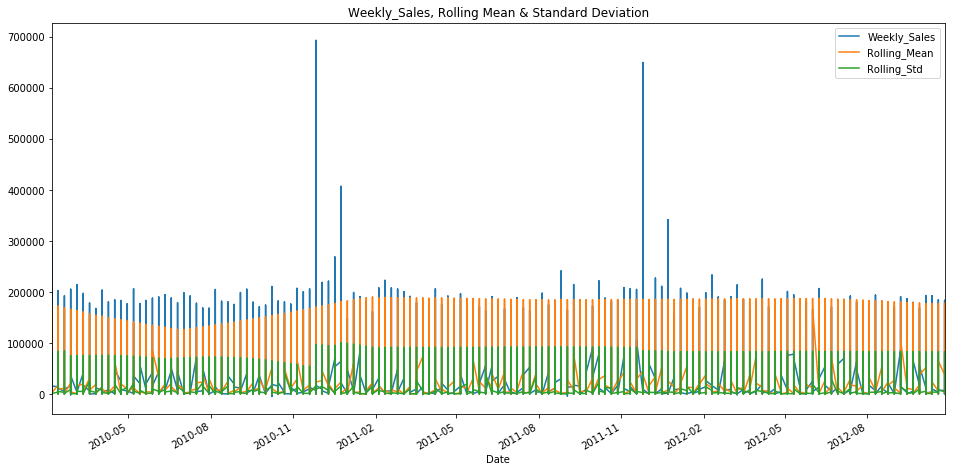

In [225]:
plt.figure(figsize=(16,8))
train_new['Weekly_Sales'].plot(figsize=(16,8),title='Weekly_Sales')
train_new['Rolling_Mean'].dropna().plot(figsize=(16,8),title='Rolling Mean')
train_new['Rolling_Std'].dropna().plot(figsize=(16,8),title='Rolling Std')
plt.title('Weekly_Sales, Rolling Mean & Standard Deviation')
plt.legend(loc='best');

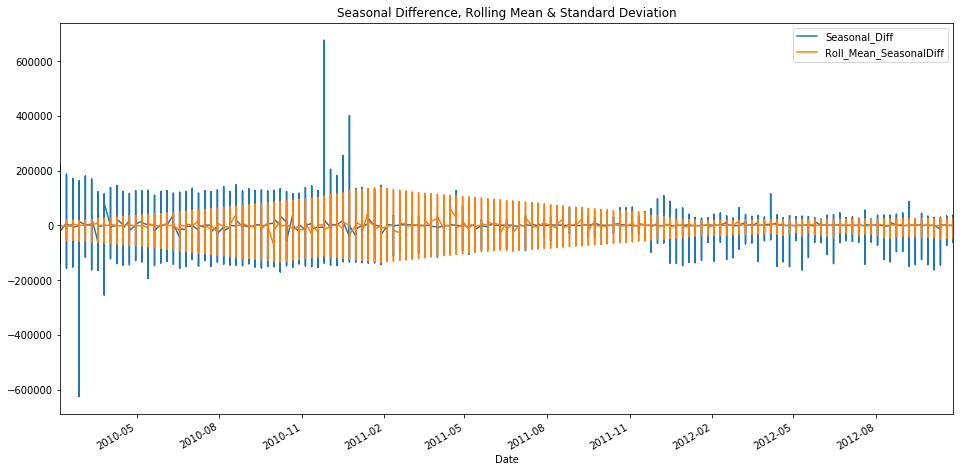

In [226]:
plt.figure(figsize=(16,8))
train_new['Seasonal_Diff'].dropna().plot(figsize=(16,8),title='Seasonal Diff')
train_new['Roll_Mean_SeasonalDiff'].dropna().plot(figsize=(16,8),title='Rolling Mean SeasonalDiff')
#train_new['Roll_Std_SeasonalDiff'].dropna().plot(figsize=(16,8),title='Rolling Std SeasonalDiff')
plt.title('Seasonal Difference, Rolling Mean & Standard Deviation')
plt.legend(loc='best');

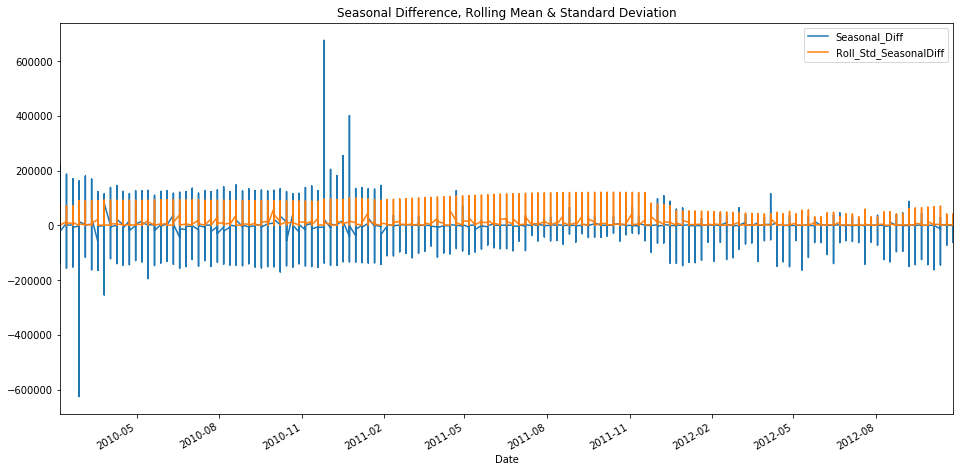

In [227]:
plt.figure(figsize=(16,8))
train_new['Seasonal_Diff'].dropna().plot(figsize=(16,8),title='Seasonal Diff')
#train_new['Roll_Mean_SeasonalDiff'].dropna().plot(figsize=(16,8),title='Rolling Mean SeasonalDiff')
train_new['Roll_Std_SeasonalDiff'].dropna().plot(figsize=(16,8),title='Rolling Std SeasonalDiff')
plt.title('Seasonal Difference, Rolling Mean & Standard Deviation')
plt.legend(loc='best');

In [228]:
# Data is now stationary, as we can see that the mean and std is around 0.

In [229]:
train_new.head(10)

,Store,Dept,Weekly_Sales,IsHoliday,Log_WeeklySales,Rolling_Mean,Rolling_Std,FirstDiff_shift_1,RollMean_FirstDiff,Seasonal_Diff,Roll_Mean_SeasonalDiff,Roll_Std_SeasonalDiff
Date,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,10.123607,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-12,1,1,46039.49,True,10.737255,NaN,NaN,21114.99,NaN,NaN,NaN,NaN
2010-02-19,1,1,41595.55,False,10.635748,NaN,NaN,-4443.94,NaN,NaN,NaN,NaN
2010-02-26,1,1,19403.54,False,9.873211,NaN,NaN,-22192.01,NaN,NaN,NaN,NaN
2010-03-05,1,1,21827.90,False,9.990944,NaN,NaN,2424.36,NaN,NaN,NaN,NaN
2010-03-12,1,1,21043.39,False,9.954342,NaN,NaN,-784.51,NaN,NaN,NaN,NaN
2010-03-19,1,1,22136.64,False,10.004989,NaN,NaN,1093.25,NaN,NaN,NaN,NaN
2010-03-26,1,1,26229.21,False,10.174629,NaN,NaN,4092.57,NaN,NaN,NaN,NaN
2010-04-02,1,1,57258.43,False,10.955330,NaN,NaN,31029.22,NaN,NaN,NaN,NaN


In [230]:
train_new['Log_SeasonalDiff'] = train_new[['Seasonal_Diff']].apply(log_transform_WeeklySales,axis=1)

In [231]:
train_new.head(10)

,Store,Dept,Weekly_Sales,IsHoliday,Log_WeeklySales,Rolling_Mean,Rolling_Std,FirstDiff_shift_1,RollMean_FirstDiff,Seasonal_Diff,Roll_Mean_SeasonalDiff,Roll_Std_SeasonalDiff,Log_SeasonalDiff
Date,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,10.123607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-12,1,1,46039.49,True,10.737255,NaN,NaN,21114.99,NaN,NaN,NaN,NaN,NaN
2010-02-19,1,1,41595.55,False,10.635748,NaN,NaN,-4443.94,NaN,NaN,NaN,NaN,NaN
2010-02-26,1,1,19403.54,False,9.873211,NaN,NaN,-22192.01,NaN,NaN,NaN,NaN,NaN
2010-03-05,1,1,21827.90,False,9.990944,NaN,NaN,2424.36,NaN,NaN,NaN,NaN,NaN
2010-03-12,1,1,21043.39,False,9.954342,NaN,NaN,-784.51,NaN,NaN,NaN,NaN,NaN
2010-03-19,1,1,22136.64,False,10.004989,NaN,NaN,1093.25,NaN,NaN,NaN,NaN,NaN
2010-03-26,1,1,26229.21,False,10.174629,NaN,NaN,4092.57,NaN,NaN,NaN,NaN,NaN
2010-04-02,1,1,57258.43,False,10.955330,NaN,NaN,31029.22,NaN,NaN,NaN,NaN,NaN


### ACF and PACF charts and find the optimal p and q parameters

In [138]:
from statsmodels.tsa.stattools import acf, pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf 

In [232]:
Seasonal_Diff = train_new[['Seasonal_Diff', 'Log_SeasonalDiff']]

In [234]:
Seasonal_Diff.dropna(inplace=True)

C:\Users\b003373\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [235]:
Seasonal_Diff

,Seasonal_Diff,Log_SeasonalDiff
Date,,
2011-02-04,-3258.74,0.000000
2011-02-11,-8152.32,0.000000
2011-02-18,5250.32,8.566044
2011-02-25,-39.71,0.000000
2011-03-04,-1500.29,0.000000
2011-03-11,237.01,5.468102
2011-03-18,-1802.41,0.000000
2011-03-25,-5348.11,0.000000
2011-04-01,-36860.34,0.000000


In [263]:
lag_acf = acf(Seasonal_Diff['Seasonal_Diff'],nlags=60)

lag_pacf = pacf(Seasonal_Diff['Seasonal_Diff'], nlags=60, method='ols')

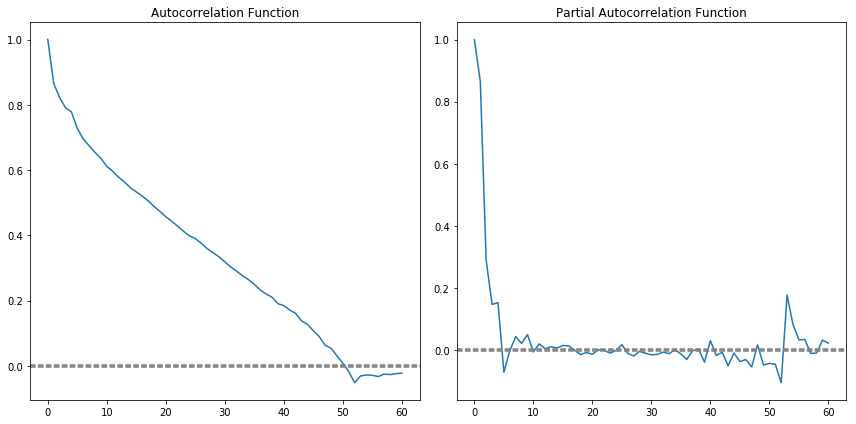

In [264]:
#Plot ACF:
plt.figure(figsize=(12,6))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Seasonal_Diff['Seasonal_Diff'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Seasonal_Diff['Seasonal_Diff'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Seasonal_Diff['Seasonal_Diff'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Seasonal_Diff['Seasonal_Diff'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
## ACF and PCF graphs of Log_SeasonalDiff

In [240]:
lag_acf = acf(Seasonal_Diff['Log_SeasonalDiff'],nlags=60)

lag_pacf = pacf(Seasonal_Diff['Log_SeasonalDiff'], nlags=60, method='ols')

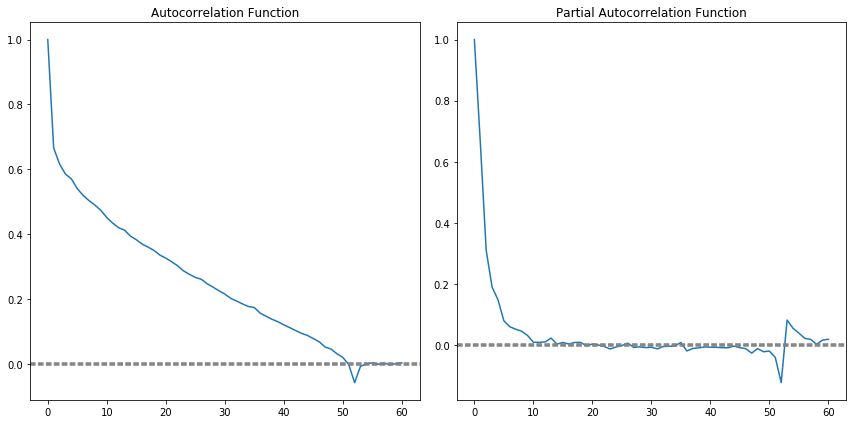

In [253]:
#Plot ACF:
plt.figure(figsize=(12,6))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Seasonal_Diff['Log_SeasonalDiff'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Seasonal_Diff['Log_SeasonalDiff'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Seasonal_Diff['Log_SeasonalDiff'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Seasonal_Diff['Log_SeasonalDiff'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

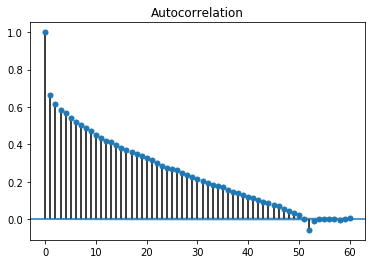

In [255]:
plot_acf(Seasonal_Diff['Log_SeasonalDiff'], lags=60);

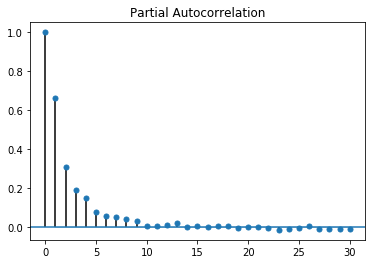

In [259]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(Seasonal_Diff['Log_SeasonalDiff'], lags=30);

In [261]:
## p = 1, d = 1, q = 1

In [262]:
from statsmodels.tsa.arima_model import ARIMA

In [273]:
# fit model
model_AR = ARIMA(train_df['Weekly_Sales'], order=(2,1,0))
model_fit = model_AR.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.Weekly_Sales   No. Observations:               421569
Model:                 ARIMA(2, 1, 0)   Log Likelihood            -4325695.429
Method:                       css-mle   S.D. of innovations           6918.845
Date:                Mon, 15 Jan 2018   AIC                        8651398.857
Time:                        21:40:11   BIC                        8651442.664
Sample:                    02-12-2010   HQIC                       8651411.347
                         - 10-26-2012                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0566      6.619     -0.009      0.993     -13.030      12.917
ar.L1.D.Weekly_Sales    -0.4153      0.002   -274.905      0.000      -0.418      -0.412
ar.L2.D.Week